<a href="https://colab.research.google.com/github/subbu27iitb/Anomaly-Detection/blob/main/Isolation_Forest_PL17Indo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
upload = files.upload()

Saving TRAINING_DATA.csv to TRAINING_DATA.csv


In [36]:
df=pd.read_csv("TRAINING_DATA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35097 entries, 0 to 35096
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TimeStamp                   35097 non-null  object 
 1   RESLURRY_MAKEUP_FLOW        35097 non-null  float64
 2   STRIPPER_OVHD_PRESSURE      35097 non-null  float64
 3   STRIPPER_LVL_STEAM_RATIO    35097 non-null  float64
 4   DESUPERHEATED_IMD_TEMP      35097 non-null  float64
 5   AFTER_COOLER_PRESSURE       35097 non-null  float64
 6   INLET_SLURRY_TEMP           35097 non-null  float64
 7   RESLURRY_OUTLET_TEMP        35097 non-null  float64
 8   RESLURRY_MAKEUP_WATER_TEMP  35097 non-null  float64
 9   STRIPPER_OVHD_TEMP          35097 non-null  float64
 10  FEATURE_ENGG_TAG            35097 non-null  float64
 11  RESLURRY_LEVEL              35097 non-null  float64
 12  RARATE_STEAMFLOW_RATIO      35097 non-null  float64
dtypes: float64(12), object(1)
memor

In [37]:
df.head()

,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO
0,1/1/2019 12:00,32.451711,0.001405,12.255049,103.561652,0.195272,70.262114,69.813573,78.839156,96.775594,14.620216,40.111303,9.491214
1,1/1/2019 12:30,32.542909,0.001485,12.219430,103.589308,0.205718,70.797304,70.212999,79.218889,96.995447,15.115400,40.462357,9.775937
2,1/1/2019 13:00,32.369831,0.001821,12.092653,103.696804,0.211992,71.027153,70.520781,79.532833,96.854643,15.155729,39.847361,9.692639
3,1/1/2019 13:30,32.551285,0.001276,12.252298,103.571153,0.207812,70.716012,70.067422,78.788104,97.947372,14.461761,40.361525,9.403119
4,1/1/2019 14:00,32.493784,0.001347,12.165867,103.528416,0.205763,70.480705,70.015142,78.505096,97.475693,14.487778,40.447935,9.404576


In [38]:
df["TimeStamp"]=pd.to_datetime(df["TimeStamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35097 entries, 0 to 35096
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   TimeStamp                   35097 non-null  datetime64[ns]
 1   RESLURRY_MAKEUP_FLOW        35097 non-null  float64       
 2   STRIPPER_OVHD_PRESSURE      35097 non-null  float64       
 3   STRIPPER_LVL_STEAM_RATIO    35097 non-null  float64       
 4   DESUPERHEATED_IMD_TEMP      35097 non-null  float64       
 5   AFTER_COOLER_PRESSURE       35097 non-null  float64       
 6   INLET_SLURRY_TEMP           35097 non-null  float64       
 7   RESLURRY_OUTLET_TEMP        35097 non-null  float64       
 8   RESLURRY_MAKEUP_WATER_TEMP  35097 non-null  float64       
 9   STRIPPER_OVHD_TEMP          35097 non-null  float64       
 10  FEATURE_ENGG_TAG            35097 non-null  float64       
 11  RESLURRY_LEVEL              35097 non-null  float64   

In [39]:
fig = px.line(df, x="TimeStamp", y="STRIPPER_LVL_STEAM_RATIO", title = "STRIPPER_LVL_STEAM_RATIO")
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [40]:
data = df.drop("TimeStamp", axis=1)
print(data.columns)
print(df.columns)
type(data)

Index(['RESLURRY_MAKEUP_FLOW', 'STRIPPER_OVHD_PRESSURE',
       'STRIPPER_LVL_STEAM_RATIO', 'DESUPERHEATED_IMD_TEMP',
       'AFTER_COOLER_PRESSURE', 'INLET_SLURRY_TEMP', 'RESLURRY_OUTLET_TEMP',
       'RESLURRY_MAKEUP_WATER_TEMP', 'STRIPPER_OVHD_TEMP', 'FEATURE_ENGG_TAG',
       'RESLURRY_LEVEL', 'RARATE_STEAMFLOW_RATIO'],
      dtype='object')
Index(['TimeStamp', 'RESLURRY_MAKEUP_FLOW', 'STRIPPER_OVHD_PRESSURE',
       'STRIPPER_LVL_STEAM_RATIO', 'DESUPERHEATED_IMD_TEMP',
       'AFTER_COOLER_PRESSURE', 'INLET_SLURRY_TEMP', 'RESLURRY_OUTLET_TEMP',
       'RESLURRY_MAKEUP_WATER_TEMP', 'STRIPPER_OVHD_TEMP', 'FEATURE_ENGG_TAG',
       'RESLURRY_LEVEL', 'RARATE_STEAMFLOW_RATIO'],
      dtype='object')


pandas.core.frame.DataFrame

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(data)
input_data_scaled = data_scaled.transform(data)

In [42]:
#model = IsolationForest(contamination=0.003, max_features=13, max_samples=0.8, n_estimators=50)
model = IsolationForest(contamination=0.003, max_features=12, max_samples=0.8, n_estimators=50)
#model.fit(data)
model.fit(input_data_scaled)

IsolationForest(contamination=0.003, max_features=12, max_samples=0.8,
                n_estimators=50)

In [43]:
#df["outliers"] = pd.Series(model.predict(data)).apply(lambda x:"yes" if(x==-1) else "no")
df["outliers"] = pd.Series(model.predict(input_data_scaled)).apply(lambda x:"yes" if(x==-1) else "no")
print(df.shape)
print(df.query('outliers=="yes"').shape)
df.query('outliers=="yes"')

(35097, 14)
(106, 14)


,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers
1262,2019-01-29 18:00:00,44.690733,0.001891,11.843631,103.686850,0.314019,70.653908,69.613228,77.442009,92.839568,21.037804,35.141450,13.153973,yes
1263,2019-01-29 18:30:00,44.666508,0.001746,11.797109,103.691855,0.315947,67.831164,67.255371,74.811283,91.901212,20.505102,34.566092,12.820869,yes
1264,2019-01-29 19:00:00,44.632556,0.001753,11.699102,103.682514,0.314110,67.931690,67.395554,74.735612,91.872709,20.346037,35.311948,12.701925,yes
1265,2019-01-29 19:30:00,44.632968,0.001677,11.614183,103.721553,0.313248,68.979366,68.515747,75.945441,92.752792,19.979046,35.072467,12.490895,yes
1606,2019-02-06 10:00:00,40.053971,0.002495,11.453348,104.138954,0.242529,74.766635,74.067764,82.706484,96.686550,30.345894,34.367207,18.988392,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34575,2021-05-21 02:30:00,35.387856,0.007887,8.235448,104.253929,0.198700,78.283569,78.755096,89.622253,98.386375,10.059378,33.721542,5.729998,yes
34958,2021-05-29 02:30:00,35.406623,0.011266,9.844974,103.920322,0.252017,78.823747,77.878306,88.475938,98.278699,11.682960,37.017397,6.902547,yes
34983,2021-05-29 15:00:00,35.519539,0.000135,10.414648,102.986103,0.017376,76.559097,75.730512,86.885675,101.005005,16.226039,37.507595,10.980637,yes
34985,2021-05-29 16:00:00,35.470015,0.007321,10.498817,102.946191,0.095272,78.110479,77.332929,88.851287,100.969860,16.359811,36.834883,11.154869,yes


In [48]:
df.query('outliers=="no"')

,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers
0,2019-01-01 12:00:00,32.451711,0.001405,12.255049,103.561652,0.195272,70.262114,69.813573,78.839156,96.775594,14.620216,40.111303,9.491214,no
1,2019-01-01 12:30:00,32.542909,0.001485,12.219430,103.589308,0.205718,70.797304,70.212999,79.218889,96.995447,15.115400,40.462357,9.775937,no
2,2019-01-01 13:00:00,32.369831,0.001821,12.092653,103.696804,0.211992,71.027153,70.520781,79.532833,96.854643,15.155729,39.847361,9.692639,no
3,2019-01-01 13:30:00,32.551285,0.001276,12.252298,103.571153,0.207812,70.716012,70.067422,78.788104,97.947372,14.461761,40.361525,9.403119,no
4,2019-01-01 14:00:00,32.493784,0.001347,12.165867,103.528416,0.205763,70.480705,70.015142,78.505096,97.475693,14.487778,40.447935,9.404576,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35092,2021-05-31 21:30:00,35.378231,0.006260,9.353592,103.225360,0.230906,78.027223,77.059383,86.647106,98.475204,12.713034,36.586624,8.706476,no
35093,2021-05-31 22:00:00,35.407399,0.006184,9.406388,103.253532,0.181918,77.726753,76.753656,86.374647,98.465230,12.737194,37.252920,8.715352,no
35094,2021-05-31 22:30:00,35.391461,0.006322,9.474610,103.267584,0.182638,77.560048,76.624505,86.172707,98.452443,12.753169,36.904327,8.722591,no
35095,2021-05-31 23:00:00,35.425383,0.006496,9.408699,103.325923,0.182671,78.005147,77.142958,86.811658,98.501995,12.756989,36.827722,8.624919,no


In [49]:
df.head()

,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers
0,2019-01-01 12:00:00,32.451711,0.001405,12.255049,103.561652,0.195272,70.262114,69.813573,78.839156,96.775594,14.620216,40.111303,9.491214,no
1,2019-01-01 12:30:00,32.542909,0.001485,12.219430,103.589308,0.205718,70.797304,70.212999,79.218889,96.995447,15.115400,40.462357,9.775937,no
2,2019-01-01 13:00:00,32.369831,0.001821,12.092653,103.696804,0.211992,71.027153,70.520781,79.532833,96.854643,15.155729,39.847361,9.692639,no
3,2019-01-01 13:30:00,32.551285,0.001276,12.252298,103.571153,0.207812,70.716012,70.067422,78.788104,97.947372,14.461761,40.361525,9.403119,no
4,2019-01-01 14:00:00,32.493784,0.001347,12.165867,103.528416,0.205763,70.480705,70.015142,78.505096,97.475693,14.487778,40.447935,9.404576,no


In [50]:
df.describe()

,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO
count,35097.000000,35097.000000,35097.000000,35097.000000,3.509700e+04,35097.000000,35097.000000,35097.000000,35097.000000,35097.000000,35097.000000,35097.000000
mean,34.457064,0.002870,9.970504,104.241854,2.485683e-01,73.076213,72.411027,82.580636,97.072614,15.528692,39.125018,9.497985
std,2.515238,0.002377,1.066623,0.858008,5.285222e-02,2.171932,2.214001,3.101863,1.649140,2.406701,2.184088,1.385289
min,26.953252,0.000000,5.137434,102.342328,1.860000e-33,58.019880,59.304333,66.817661,86.044802,8.078365,12.121026,4.257512
25%,33.089481,0.001067,9.156853,103.605178,2.155100e-01,71.680812,71.035126,80.612620,96.437813,13.744216,39.460834,8.578335
50%,34.012133,0.001872,9.957004,104.054344,2.458531e-01,73.029391,72.358290,82.274886,97.407040,15.852896,39.917677,9.569579
75%,35.036836,0.004187,10.747536,104.724420,2.829474e-01,74.320093,73.683184,84.211910,98.197580,17.320024,40.185790,10.350904
max,45.455944,0.014447,15.912941,107.748886,3.959121e-01,80.634614,79.934611,94.912170,101.169106,35.000000,83.090412,21.109191


In [51]:
fig = px.scatter(df, x="TimeStamp", y="STRIPPER_LVL_STEAM_RATIO", color="outliers", hover_data=["RARATE_STEAMFLOW_RATIO"], title="STRIPPER_LVL_STEAM_RATIO")
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

**Evaluation**

In [ ]:
upload=files.upload()

Saving EVALUATING DATA_ABNORMAL.csv to EVALUATING DATA_ABNORMAL.csv


In [ ]:
df_Eval_abnor=pd.read_csv("EVALUATING DATA_ABNORMAL.csv")
df_Eval_abnor.head()

,TimeStamp,Root.IEPL.PE.PID.FIC3027.PV,Root.IEPL.PE.PID.FIC3243.PV,Root.IEPL.PE.PID.LIC3035.PV,Root.IEPL.PE.PID.LIC3372.PV,Root.IEPL.PE.PID.PIC3060.PV,Root.IEPL.PE.PID.TIC3064.PV,Root.IEPL.PE.PVI.PI3150.PV,Root.IEPL.PE.PVI.TI3033.PV,Root.IEPL.PE.PVI.TIC3028A.PV,Root.IEPL.PE.PVI.TIC3028B.PV,Root.IEPL.PE.PVI.TX3059.PV,Root.IEPL.PE.PVI.XISI.PV,Root.IEPL.PE.PVI.LIC3015.PV
0,2/10/2019 0:35,34.208893,1.400245,16.850164,30.210361,0.002991,103.988144,0.332119,69.770988,69.056976,83.461281,85.942009,19.316341,39.571449
1,2/10/2019 0:40,33.907043,1.397438,16.853374,30.506329,0.003013,103.991768,0.332018,69.739731,69.124001,83.425873,85.694870,19.296246,39.528328
2,2/10/2019 0:45,33.891914,1.399366,16.925892,30.593880,0.003005,103.995666,0.331822,69.633560,69.098640,83.481155,85.619797,19.231113,40.386192
3,2/10/2019 0:50,33.951550,1.395989,16.942894,30.435362,0.003000,104.005341,0.334809,69.711792,69.077034,83.413437,85.400101,19.405235,39.479305
4,2/10/2019 0:55,34.211651,1.398486,16.820463,30.259342,0.002996,104.012054,0.336576,69.620346,69.035370,83.382721,85.131256,19.528397,38.984028


In [ ]:
data_abnor=df_Eval_abnor.drop("TimeStamp", axis=1)
data_abnor.columns

Index(['Root.IEPL.PE.PID.FIC3027.PV', 'Root.IEPL.PE.PID.FIC3243.PV',
       'Root.IEPL.PE.PID.LIC3035.PV', 'Root.IEPL.PE.PID.LIC3372.PV',
       'Root.IEPL.PE.PID.PIC3060.PV', 'Root.IEPL.PE.PID.TIC3064.PV',
       'Root.IEPL.PE.PVI.PI3150.PV', 'Root.IEPL.PE.PVI.TI3033.PV',
       'Root.IEPL.PE.PVI.TIC3028A.PV', 'Root.IEPL.PE.PVI.TIC3028B.PV',
       'Root.IEPL.PE.PVI.TX3059.PV', 'Root.IEPL.PE.PVI.XISI.PV',
       'Root.IEPL.PE.PVI.LIC3015.PV'],
      dtype='object')

In [ ]:
test1_data_scaled = data_scaled.transform(data_abnor)

In [ ]:
#df_Eval_abnor["outliers"] = pd.Series(model.predict(test1_data_scaled)).apply(lambda x: "yes" if(x==-1) else 'no')
df_Eval_abnor["outliers"] = pd.Series(model.predict(data_abnor)).apply(lambda x: "yes" if(x==-1) else 'no')

In [ ]:
df_Eval_abnor.shape

(2905, 15)

In [ ]:
df_Eval_abnor.query('outliers=="yes"')

,TimeStamp,Root.IEPL.PE.PID.FIC3027.PV,Root.IEPL.PE.PID.FIC3243.PV,Root.IEPL.PE.PID.LIC3035.PV,Root.IEPL.PE.PID.LIC3372.PV,Root.IEPL.PE.PID.PIC3060.PV,Root.IEPL.PE.PID.TIC3064.PV,Root.IEPL.PE.PVI.PI3150.PV,Root.IEPL.PE.PVI.TI3033.PV,Root.IEPL.PE.PVI.TIC3028A.PV,Root.IEPL.PE.PVI.TIC3028B.PV,Root.IEPL.PE.PVI.TX3059.PV,Root.IEPL.PE.PVI.XISI.PV,Root.IEPL.PE.PVI.LIC3015.PV,outliers
51,2/10/2019 4:50,34.075634,1.394328,17.159800,30.040981,0.003378,104.531494,0.106587,69.280197,68.448174,82.095505,84.193100,19.452705,39.717976,yes
53,2/10/2019 5:00,33.724934,1.400643,17.330832,29.481297,0.003419,104.522141,0.312327,68.684258,68.096771,81.632942,84.061371,19.619007,39.173134,yes
56,2/10/2019 5:15,33.927933,1.396787,17.332344,30.637571,0.003516,104.561844,0.316750,68.801193,68.223145,81.843399,83.625854,19.579155,42.060829,yes
64,2/10/2019 5:55,34.183624,1.393383,17.412682,29.509327,0.003650,104.726189,0.316579,68.905289,68.292992,81.716728,83.158691,19.577221,40.987183,yes
67,2/10/2019 6:10,33.934170,1.395889,17.395298,30.564095,0.003772,104.744644,0.316114,68.778946,68.206741,81.702827,82.959602,19.616972,39.446285,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,4/30/2019 8:40,37.434067,1.829259,16.227427,31.747749,0.000933,106.684288,0.101556,72.364105,71.874992,81.812119,87.334381,13.134615,39.839355,yes
2895,4/30/2019 8:45,37.353962,1.838237,16.313824,31.490444,0.000872,106.706528,0.102019,72.445274,72.135544,82.027527,88.149796,13.393087,40.284218,yes
2896,4/30/2019 8:50,37.524368,1.835910,16.330458,30.535175,0.002054,106.761146,0.257396,74.201019,79.178322,83.575203,86.257767,0.000000,39.638252,yes
2897,4/30/2019 8:55,37.497868,1.852780,16.385931,30.056496,0.001592,106.720764,0.324199,82.347275,80.488007,80.430443,91.853348,0.000000,40.508625,yes


In [ ]:
df_Eval_abnor.query('outliers=="no"')

,TimeStamp,Root.IEPL.PE.PID.FIC3027.PV,Root.IEPL.PE.PID.FIC3243.PV,Root.IEPL.PE.PID.LIC3035.PV,Root.IEPL.PE.PID.LIC3372.PV,Root.IEPL.PE.PID.PIC3060.PV,Root.IEPL.PE.PID.TIC3064.PV,Root.IEPL.PE.PVI.PI3150.PV,Root.IEPL.PE.PVI.TI3033.PV,Root.IEPL.PE.PVI.TIC3028A.PV,Root.IEPL.PE.PVI.TIC3028B.PV,Root.IEPL.PE.PVI.TX3059.PV,Root.IEPL.PE.PVI.XISI.PV,Root.IEPL.PE.PVI.LIC3015.PV,outliers
0,2/10/2019 0:35,34.208893,1.400245,16.850164,30.210361,0.002991,103.988144,0.332119,69.770988,69.056976,83.461281,85.942009,19.316341,39.571449,no
1,2/10/2019 0:40,33.907043,1.397438,16.853374,30.506329,0.003013,103.991768,0.332018,69.739731,69.124001,83.425873,85.694870,19.296246,39.528328,no
2,2/10/2019 0:45,33.891914,1.399366,16.925892,30.593880,0.003005,103.995666,0.331822,69.633560,69.098640,83.481155,85.619797,19.231113,40.386192,no
3,2/10/2019 0:50,33.951550,1.395989,16.942894,30.435362,0.003000,104.005341,0.334809,69.711792,69.077034,83.413437,85.400101,19.405235,39.479305,no
4,2/10/2019 0:55,34.211651,1.398486,16.820463,30.259342,0.002996,104.012054,0.336576,69.620346,69.035370,83.382721,85.131256,19.528397,38.984028,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,4/30/2019 9:10,37.364426,1.854178,16.201660,29.769941,0.002477,106.808899,0.294574,71.527359,73.010674,83.182266,90.295731,13.370716,38.703629,no
2901,4/30/2019 9:15,37.176846,1.858310,16.129818,29.934410,0.002675,106.764221,0.302205,74.017090,74.001495,84.065933,90.603287,13.508869,40.728256,no
2902,4/30/2019 9:20,37.487122,1.863988,16.053608,30.665428,0.002922,106.791031,0.301738,74.776115,74.634079,84.829132,91.292755,13.613119,41.065239,no
2903,4/30/2019 9:25,37.293072,1.867203,15.942271,29.599789,0.003130,106.805511,0.301266,75.303169,75.043060,85.393478,91.842552,13.713251,39.268047,no


**Identify  Score Threshold**

In [ ]:
score = model.decision_function(data)
score

array([0.16995961, 0.17669514, 0.17958552, ..., 0.08969506, 0.09668524,
       0.09247809])

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        1.000e+01, 6.000e+00, 9.000e+00, 8.000e+00, 1.800e+01, 1.300e+01,
        1.800e+01, 2.600e+01, 2.400e+01, 4.400e+01, 3.600e+01, 5.100e+01,
        4.400e+01, 6.800e+01, 9.900e+01, 8.300e+01, 1.070e+02, 1.070e+02,
        1.360e+02, 1.800e+02, 2.210e+02, 3.020e+02, 3.830e+02, 4.610e+02,
        5.860e+02, 6.890e+02, 8.060e+02, 1.069e+03, 1.240e+03, 1.454e+03,
        1.729e+03, 2.053e+03, 2.564e+03, 2.910e+03, 2.855e+03, 1.443e+03,
        6.150e+02, 7.800e+01]),
 array([-0.1136405 , -0.10690104, -0.10016157, -0.09342211, -0.08668265,
        -0.07994319, -0.07320372, -0.06646426, -0.0597248 , -0.05298534,
        -0.04624587, -0.03950641, -0.03276695, -0.02602748, -0.01928802,
        -0.01254856, -0.0058091 ,  0.00093037,  0.00766983,  0.01440929,
         0.02114875,  0.02788822,  0.03462768,  0.04136714,  0.0481066 ,
         0.

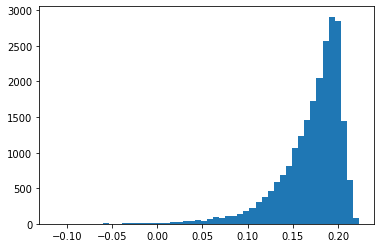

In [ ]:
plt.hist(score, bins=50)

In [ ]:
df["score"] = score
print(df.shape)
print(df.query('score<0.09').shape)
df.query('score<0.09')

(22567, 16)
(828, 16)


,TimeStamp,Root.IEPL.PE.PID.FIC3027.PV,Root.IEPL.PE.PID.FIC3243.PV,Root.IEPL.PE.PID.LIC3035.PV,Root.IEPL.PE.PID.LIC3372.PV,Root.IEPL.PE.PID.PIC3060.PV,Root.IEPL.PE.PID.TIC3064.PV,Root.IEPL.PE.PVI.PI3150.PV,Root.IEPL.PE.PVI.TI3033.PV,Root.IEPL.PE.PVI.TIC3028A.PV,Root.IEPL.PE.PVI.TIC3028B.PV,Root.IEPL.PE.PVI.TX3059.PV,Root.IEPL.PE.PVI.XISI.PV,Root.IEPL.PE.PVI.LIC3015.PV,outliers,score
36,2019-01-03 06:30:00,32.444841,1.535946,12.589702,38.063730,0.000889,103.403775,3.530000e-32,73.127757,72.555737,83.043322,97.594630,14.921343,39.645909,no,0.051084
90,2019-01-04 09:30:00,32.262583,1.540349,16.714260,30.124020,0.001206,103.497000,1.333706e-01,72.194120,71.534168,81.490519,98.019395,14.158766,49.041175,no,0.042710
374,2019-01-10 07:30:00,31.579497,1.530160,15.279926,29.740086,0.009451,105.439017,2.843822e-01,70.802898,70.193577,83.205321,97.844382,18.626167,40.894299,no,0.075553
375,2019-01-10 08:00:00,31.688202,1.529709,15.412968,29.418024,0.009846,105.523750,2.116716e-01,70.478427,69.821004,82.519864,96.719316,18.199226,41.515856,no,0.063755
376,2019-01-10 08:30:00,31.628189,1.531330,15.557932,30.159919,0.010426,105.696885,2.700003e-01,70.716122,70.181822,82.860793,96.891230,18.194187,39.296265,no,0.073195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550,2021-05-31 15:30:00,35.001681,1.410593,16.547718,30.255064,0.001159,102.941219,2.086555e-01,79.687850,79.276835,88.186826,98.415422,11.567518,37.878789,no,0.075205
22559,2021-05-31 20:00:00,34.926980,1.420353,14.947722,29.864543,0.001130,102.717623,2.457011e-01,79.072866,78.709184,87.583097,98.245702,11.385290,38.985689,no,0.065180
22561,2021-05-31 21:00:00,34.975601,1.414681,14.676843,30.403858,0.001122,102.760684,2.200367e-01,78.964947,78.579552,87.412963,98.279264,11.433428,38.292846,no,0.086612
22562,2021-05-31 21:30:00,35.002076,1.413378,14.252697,29.765157,0.001148,102.771084,2.198175e-01,78.935383,78.564981,87.420907,98.276217,11.457198,38.726552,no,0.078436


[0.04495355 0.04786874 0.04168888 ... 0.05830609 0.06660741 0.08277372]


(array([544.,  53.,  33.,   7.,   9.,   6.,  10.,  12.,  15.,  11.,  12.,
          4.,   3.,   2.,   3.,   3.,   2.,   2.,   2.,   0.,   2.,   7.,
         15.,  12.,  17.,  10.,   9.,   3.,   1.,   4.,   2.,   5.,   5.,
          3.,   3.,   4.,   5.,  13.,  14.,  11.,  21.,  12.,  28.,  41.,
         38.,  42.,  40.,  35.,  39.,  41.,  30.,  42.,  46.,  42.,  44.,
         49.,  39.,  48.,  53.,  80.,  92., 132., 161., 191., 199., 159.,
         94.,  62.,  37.,  13.,   9.,  16.,   6.,   9.,   9.,   6.,  14.,
          4.,   3.,   1.]),
 array([-0.26033142, -0.25531742, -0.25030342, -0.24528941, -0.24027541,
        -0.23526141, -0.23024741, -0.22523341, -0.22021941, -0.2152054 ,
        -0.2101914 , -0.2051774 , -0.2001634 , -0.1951494 , -0.1901354 ,
        -0.1851214 , -0.18010739, -0.17509339, -0.17007939, -0.16506539,
        -0.16005139, -0.15503739, -0.15002339, -0.14500938, -0.13999538,
        -0.13498138, -0.12996738, -0.12495338, -0.11993938, -0.11492538,
        -0.10991

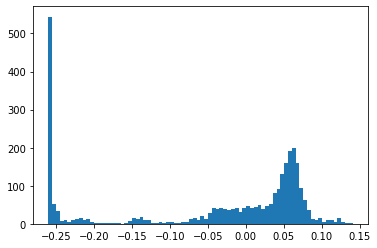

In [ ]:
score_abnor = model.decision_function(data_abnor)
print(score_abnor)
plt.hist(score_abnor, bins=80)

In [ ]:
df_Eval_abnor["score_abnor"]=score_abnor
print(df_Eval_abnor.shape)
print(df_Eval_abnor.query('score_abnor>0.09').shape)
df_Eval_abnor.query('score_abnor>0.09')

(2905, 16)
(81, 16)


,TimeStamp,Root.IEPL.PE.PID.FIC3027.PV,Root.IEPL.PE.PID.FIC3243.PV,Root.IEPL.PE.PID.LIC3035.PV,Root.IEPL.PE.PID.LIC3372.PV,Root.IEPL.PE.PID.PIC3060.PV,Root.IEPL.PE.PID.TIC3064.PV,Root.IEPL.PE.PVI.PI3150.PV,Root.IEPL.PE.PVI.TI3033.PV,Root.IEPL.PE.PVI.TIC3028A.PV,Root.IEPL.PE.PVI.TIC3028B.PV,Root.IEPL.PE.PVI.TX3059.PV,Root.IEPL.PE.PVI.XISI.PV,Root.IEPL.PE.PVI.LIC3015.PV,outliers,score_abnor
149,2/10/2019 13:00,33.924671,1.401649,18.032557,24.323822,0.002812,106.157295,0.241713,73.890259,72.885986,87.349045,95.013741,13.119677,41.657616,no,0.093804
150,8/12/2019 0:00,34.393337,1.742617,15.272598,19.537563,0.007160,105.421150,0.226631,72.687653,72.007751,82.019478,93.593918,17.522400,39.542305,no,0.121834
151,8/12/2019 0:05,34.113255,1.741665,15.265980,20.554890,0.007209,105.430359,0.227693,72.798355,72.179565,82.134033,93.634224,17.516476,40.677261,no,0.112524
152,8/12/2019 0:10,34.038826,1.740993,15.196958,19.453609,0.007254,105.421845,0.226955,72.838226,72.077911,82.133560,93.708443,17.536545,39.319916,no,0.119019
153,8/12/2019 0:15,34.157497,1.742026,15.206772,20.523182,0.007291,105.446121,0.229194,72.869568,72.196884,82.267334,93.721420,17.558132,39.770618,no,0.112902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,4/29/2019 23:25,37.568459,1.403372,14.626940,33.489937,0.002476,105.307755,0.255427,71.856987,71.385101,83.045547,98.260757,21.096592,39.965698,no,0.097121
2784,4/29/2019 23:30,37.365955,1.394022,14.667294,26.973907,0.001478,104.962097,0.245266,71.841751,71.287262,83.001396,97.987244,21.115108,39.367821,no,0.095841
2785,4/29/2019 23:35,37.282001,1.398082,14.706221,31.650124,0.000784,104.602539,0.233978,71.660538,71.075676,82.656601,97.500336,21.094435,40.106056,no,0.104590
2786,4/29/2019 23:40,37.473881,1.392198,14.824329,27.619247,0.001583,104.242394,0.225555,71.644180,71.120911,82.513336,96.330605,20.933096,40.178421,no,0.131079


In [ ]:
!pip install LIME

     |████████████████████████████████| 275 kB 5.6 MB/s 
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=2156566a7874b2eec8c5e9c5eb46a38c2e491c62342922d43fd92bb57ab580fd
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built LIME


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(training_data = np.array(data), feature_names = data.columns,
                                                mode = "classification")

In [ ]:
data_abnor.iloc[0]

Root.IEPL.PE.PID.FIC3027.PV      34.208893
Root.IEPL.PE.PID.FIC3243.PV       1.400245
Root.IEPL.PE.PID.LIC3035.PV      16.850164
Root.IEPL.PE.PID.LIC3372.PV      30.210361
Root.IEPL.PE.PID.PIC3060.PV       0.002991
Root.IEPL.PE.PID.TIC3064.PV     103.988144
Root.IEPL.PE.PVI.PI3150.PV        0.332119
Root.IEPL.PE.PVI.TI3033.PV       69.770988
Root.IEPL.PE.PVI.TIC3028A.PV     69.056976
Root.IEPL.PE.PVI.TIC3028B.PV     83.461281
Root.IEPL.PE.PVI.TX3059.PV       85.942009
Root.IEPL.PE.PVI.XISI.PV         19.316341
Root.IEPL.PE.PVI.LIC3015.PV      39.571449
Name: 0, dtype: float64

In [ ]:
exp = interpretor.explain_instance(
    #data_row = X_test.iloc[4],
    data_row = data_abnor.iloc[0],
    predict_fn = model.predict_proba
)
exp.show_in_notebook(show_table=True)

AttributeError: ignored

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


https://stackoverflow.com/questions/70450755/shap-xgboost-and-lightgbm-difference-in-shap-values-calculation

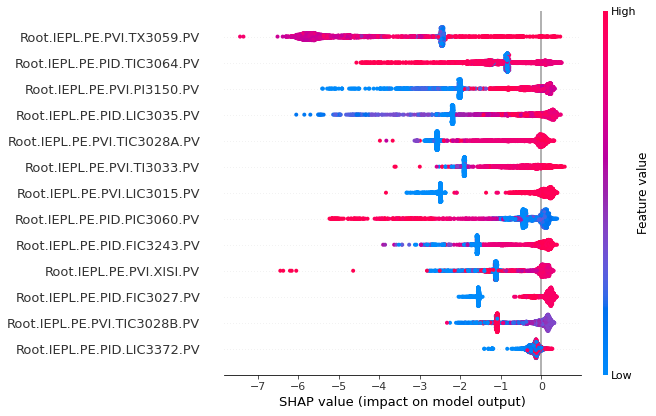

In [ ]:
import shap
from sklearn.ensemble import IsolationForest

# Load data and train Anomaly Detector as usual 
#X_train, X_test, ...
#est = IsolationForest()
#est.fit(...)

# Create shap values and plot them
X_explain = data_abnor
shap_values = shap.TreeExplainer(model).shap_values(X_explain)
shap.summary_plot(shap_values, X_explain)

**Evaluation - Test data (Fire Incident)**

In [25]:
from google.colab import files
upload = files.upload()

Saving EVALUATION_FIREINCIDENT.csv to EVALUATION_FIREINCIDENT.csv


In [52]:
df_test01 = pd.read_csv("EVALUATION_FIREINCIDENT.csv")
df_test01.head()

,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO
0,2/10/2019 0:35,34.208893,0.002991,12.033725,103.988144,0.332119,69.770988,69.056976,83.461281,85.942009,19.316341,39.571449,13.794972
1,2/10/2019 0:40,33.907043,0.003013,12.060195,103.991768,0.332018,69.739731,69.124001,83.425873,85.694870,19.296246,39.528328,13.808302
2,2/10/2019 0:45,33.891914,0.003005,12.095400,103.995666,0.331822,69.633560,69.098640,83.481155,85.619797,19.231113,40.386192,13.742733
3,2/10/2019 0:50,33.951550,0.003000,12.136836,104.005341,0.334809,69.711792,69.077034,83.413437,85.400101,19.405235,39.479305,13.900704
4,2/10/2019 0:55,34.211651,0.002996,12.027624,104.012054,0.336576,69.620346,69.035370,83.382721,85.131256,19.528397,38.984028,13.963957


In [53]:
df_test01["TimeStamp"] = pd.to_datetime(df_test01["TimeStamp"])
df_test01.dtypes

TimeStamp                     datetime64[ns]
RESLURRY_MAKEUP_FLOW                 float64
STRIPPER_OVHD_PRESSURE               float64
STRIPPER_LVL_STEAM_RATIO             float64
DESUPERHEATED_IMD_TEMP               float64
AFTER_COOLER_PRESSURE                float64
INLET_SLURRY_TEMP                    float64
RESLURRY_OUTLET_TEMP                 float64
RESLURRY_MAKEUP_WATER_TEMP           float64
STRIPPER_OVHD_TEMP                   float64
FEATURE_ENGG_TAG                     float64
RESLURRY_LEVEL                       float64
RARATE_STEAMFLOW_RATIO               float64
dtype: object

In [54]:
df_test02 = df_test01.drop("TimeStamp", axis=1)
df_test02.head()

,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO
0,34.208893,0.002991,12.033725,103.988144,0.332119,69.770988,69.056976,83.461281,85.942009,19.316341,39.571449,13.794972
1,33.907043,0.003013,12.060195,103.991768,0.332018,69.739731,69.124001,83.425873,85.694870,19.296246,39.528328,13.808302
2,33.891914,0.003005,12.095400,103.995666,0.331822,69.633560,69.098640,83.481155,85.619797,19.231113,40.386192,13.742733
3,33.951550,0.003000,12.136836,104.005341,0.334809,69.711792,69.077034,83.413437,85.400101,19.405235,39.479305,13.900704
4,34.211651,0.002996,12.027624,104.012054,0.336576,69.620346,69.035370,83.382721,85.131256,19.528397,38.984028,13.963957


In [79]:
df_test02_scaled = data_scaled.transform(df_test02)
#df_test01["outliers"] = pd.Series(model.predict(df_test02_scaled)).apply(lambda x:"yes" if(x==-1) else 'no')
df_test01["outliers"] = pd.Series(model.predict(df_test02_scaled)).apply(lambda x:"yes" if(x==-1) else 'no')
print(df_test01.shape)
print(df_test01.query('outliers=="yes"').shape)
df_test01.query('outliers=="yes"')

(2006, 15)
(535, 15)


,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers,score
0,2019-02-10 00:35:00,34.208893,0.002991,12.033725,103.988144,0.332119,69.770988,69.056976,83.461281,85.942009,19.316341,39.571449,13.794972,yes,-0.014158
1,2019-02-10 00:40:00,33.907043,0.003013,12.060195,103.991768,0.332018,69.739731,69.124001,83.425873,85.694870,19.296246,39.528328,13.808302,yes,-0.015801
2,2019-02-10 00:45:00,33.891914,0.003005,12.095400,103.995666,0.331822,69.633560,69.098640,83.481155,85.619797,19.231113,40.386192,13.742733,yes,-0.020185
3,2019-02-10 00:50:00,33.951550,0.003000,12.136836,104.005341,0.334809,69.711792,69.077034,83.413437,85.400101,19.405235,39.479305,13.900704,yes,-0.016596
4,2019-02-10 00:55:00,34.211651,0.002996,12.027624,104.012054,0.336576,69.620346,69.035370,83.382721,85.131256,19.528397,38.984028,13.963957,yes,-0.022554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2019-08-18 11:45:00,34.236790,0.000277,9.826628,108.651100,0.352108,73.374039,72.644524,85.937210,73.787148,17.759960,39.046848,10.749631,yes,-0.037129
2002,2019-08-18 11:50:00,34.106888,0.000282,9.690690,109.036392,0.372085,73.695602,72.974175,85.926659,73.946251,17.869144,39.360207,10.667918,yes,-0.040343
2003,2019-08-18 11:55:00,34.097359,0.000321,9.670002,109.242752,0.097636,73.976349,73.510139,85.981171,74.130478,17.932367,41.232895,10.717178,yes,-0.091001
2004,2019-08-18 12:00:00,33.816910,0.000497,9.932558,109.626862,0.097457,74.197853,73.360214,85.727600,74.216858,17.895844,39.265045,10.998861,yes,-0.084691


In [56]:
df_test01.query('outliers=="no"')

,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers
122,2019-02-10 10:45:00,33.946949,0.006090,13.079814,105.539047,0.332511,70.623795,70.103622,84.426926,80.334122,18.626423,40.378822,13.300118,no
124,2019-02-10 10:55:00,34.291645,0.006235,12.981034,105.578262,0.336370,70.688011,70.148460,84.366417,80.525749,14.657488,39.929878,10.441242,no
129,2019-02-10 11:20:00,34.014229,0.006548,12.888287,105.661804,0.343061,70.969948,70.250305,84.083473,81.563049,11.584006,40.668121,8.279093,no
130,2019-02-10 11:25:00,34.125366,0.006681,12.788077,105.695999,0.341491,70.998367,70.438751,84.017120,81.628639,11.712099,38.818569,8.351431,no
131,2019-02-10 11:30:00,33.970867,0.006713,12.725168,105.697113,0.342426,71.067093,70.250168,83.978058,81.785065,12.082376,39.324371,8.591161,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,2019-08-18 05:40:00,34.094433,0.001521,10.472583,106.281242,0.317492,73.134872,72.302704,86.754349,73.744370,18.259727,40.468704,11.283270,no
1929,2019-08-18 05:45:00,33.906097,0.001540,10.469712,106.156464,0.300288,73.044518,72.454880,86.717911,73.736465,18.276119,40.044800,11.288431,no
1930,2019-08-18 05:50:00,33.796352,0.001530,10.394213,106.084564,0.311603,72.984451,72.372498,86.589447,73.720940,18.237276,39.869766,11.241740,no
1931,2019-08-18 05:55:00,33.964905,0.001504,10.328281,106.248810,0.319047,72.783661,72.131302,86.409904,73.676613,18.264919,40.170456,11.208663,no


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 9.000e+00,
        3.000e+00, 6.000e+00, 9.000e+00, 1.000e+01, 1.800e+01, 2.000e+01,
        1.500e+01, 3.000e+01, 4.900e+01, 5.800e+01, 8.100e+01, 1.040e+02,
        1.200e+02, 1.480e+02, 1.510e+02, 2.170e+02, 2.570e+02, 3.370e+02,
        5.180e+02, 7.170e+02, 8.600e+02, 9.920e+02, 1.106e+03, 1.484e+03,
        2.146e+03, 2.707e+03, 3.695e+03, 4.653e+03, 5.621e+03, 5.328e+03,
        3.114e+03, 4.970e+02]),
 array([-0.20791261, -0.19956851, -0.19122441, -0.18288032, -0.17453622,
        -0.16619212, -0.15784802, -0.14950392, -0.14115982, -0.13281573,
        -0.12447163, -0.11612753, -0.10778343, -0.09943933, -0.09109523,
        -0.08275114, -0.07440704, -0.06606294, -0.05771884, -0.04937474,
        -0.04103064, -0.03268655, -0.02434245, -0.01599835, -0.00765425,
         0.

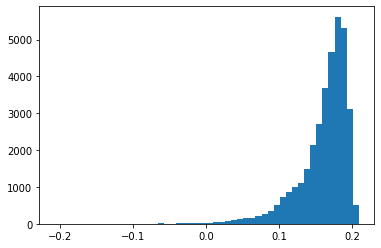

In [66]:
score=model.decision_function(input_data_scaled)
plt.hist(score, bins=50)

In [81]:
df["score"] = score
print(df.shape)
print(df.query('score<0.1').shape)
df.query("score<0.1")

(35097, 15)
(2114, 15)


,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers,score
375,2019-01-10 08:00:00,31.688202,0.009846,10.075750,105.523750,0.211672,70.478427,69.821004,82.519864,96.719316,18.199226,41.515856,11.897180,no,0.091478
377,2019-01-10 09:00:00,31.624949,0.010686,10.117330,105.747424,0.272047,71.471657,70.886017,83.603640,97.522657,18.139631,40.976823,11.857170,no,0.088462
378,2019-01-10 09:30:00,31.558909,0.010954,10.133859,105.870146,0.153305,71.717735,71.055815,83.670689,97.771962,18.121578,40.659015,11.850749,no,0.069694
379,2019-01-10 10:00:00,31.573309,0.008654,10.814731,105.648113,0.109761,71.507711,70.946021,83.218505,99.362771,18.072384,39.619962,11.988029,no,0.068019
425,2019-01-11 09:00:00,31.012022,0.009511,9.924007,105.851143,0.223061,70.308331,69.654729,82.078964,95.549767,16.882446,40.810824,11.112636,no,0.082703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35050,2021-05-31 00:30:00,35.448683,0.006609,9.629238,103.332556,0.223279,79.534634,78.549179,89.080086,98.413085,13.487965,36.611926,9.087408,no,0.090798
35051,2021-05-31 01:00:00,35.448684,0.006538,9.625019,103.302520,0.221003,79.530373,78.474946,88.983852,98.392946,13.423115,37.042965,9.053131,no,0.092102
35052,2021-05-31 01:30:00,35.353188,0.006609,9.610335,103.299530,0.221037,79.457378,78.472735,88.919872,98.375261,13.513389,36.891245,9.108636,no,0.091472
35053,2021-05-31 02:00:00,35.461502,0.006695,9.562705,103.295621,0.219744,79.423116,78.421745,88.893621,98.353765,13.364127,37.158539,8.995050,no,0.093940


(array([  2.,   2.,   0.,   1.,   2.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,   1.,
          1.,   1.,   3.,   2.,   4.,   5.,   3.,   6.,   9.,   7.,  13.,
         15.,  19.,  32.,  38.,  45.,  27.,  26.,  33.,  35.,  43.,  50.,
         54.,  31.,  14.,  20.,  12.,  16.,  17.,  24.,  27.,  31.,  28.,
         33.,  30.,  37.,  40.,  40.,  44.,  48.,  34.,  58.,  59.,  90.,
        109., 146., 166., 141.,  74.,  23.,   4.,   5.,   1.,   3.,   0.,
          7.,   7.,   4.,   7.,  13.,   7.,  11.,   9.,  23.,  12.,   0.,
          8.,   3.]),
 array([-1.80500108e-01, -1.76657327e-01, -1.72814545e-01, -1.68971764e-01,
        -1.65128983e-01, -1.61286201e-01, -1.57443420e-01, -1.53600639e-01,
        -1.49757857e-01, -1.45915076e-01, -1.42072295e-01, -1.38229513e-01,
        -1.34386732e-01, -1.30543950e-01, -1.26701169e-01, -1.22858388e-01,
        -1.19015606e-01, -1.15172825e-01, -1.11330044e-01, -1.07487262e-01,
      

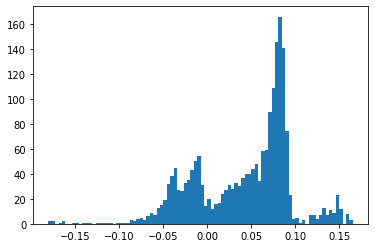

In [65]:
score_test01 = model.decision_function(df_test02_scaled)
plt.hist(score_test01, bins=90)
#df_test01["score"] = score_test01

In [80]:
df_test01["score"] = score_test01
print(df_test01.shape)
print(df_test01.query('score>0.1').shape)
df_test01.query("score>0.1")

(2006, 15)
(120, 15)


,TimeStamp,RESLURRY_MAKEUP_FLOW,STRIPPER_OVHD_PRESSURE,STRIPPER_LVL_STEAM_RATIO,DESUPERHEATED_IMD_TEMP,AFTER_COOLER_PRESSURE,INLET_SLURRY_TEMP,RESLURRY_OUTLET_TEMP,RESLURRY_MAKEUP_WATER_TEMP,STRIPPER_OVHD_TEMP,FEATURE_ENGG_TAG,RESLURRY_LEVEL,RARATE_STEAMFLOW_RATIO,outliers,score
152,2019-04-29 13:30:00,37.400673,0.000280,9.434241,103.060318,0.240587,72.001404,71.881683,81.877487,99.087303,19.705784,39.882709,13.021711,no,0.130827
153,2019-04-29 13:35:00,37.405918,0.000274,9.503740,103.042694,0.237982,72.806046,72.184517,82.956818,98.109581,19.471409,40.262932,12.908923,no,0.131121
154,2019-04-29 13:40:00,37.484222,0.000366,9.510555,103.048096,0.238308,72.606827,72.010200,83.301819,97.037979,19.585720,40.342133,12.996074,no,0.133398
155,2019-04-29 13:45:00,37.198120,0.000581,9.624876,103.066086,0.239369,72.817925,72.526436,83.652443,96.015396,19.706442,38.396576,13.089454,no,0.135103
156,2019-04-29 13:50:00,37.354080,0.000784,9.564276,103.123177,0.241949,73.022766,72.429024,83.703636,94.990402,19.838860,39.420959,13.185641,no,0.128889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2019-08-12 07:30:00,33.889530,0.007366,8.063227,105.462662,0.219302,72.490646,71.869705,81.936859,93.247620,15.028709,40.405266,8.624241,no,0.125911
518,2019-08-12 07:35:00,34.033855,0.007297,8.122790,105.445030,0.219252,72.617989,71.968140,82.087677,93.434357,14.336119,39.036606,8.244279,no,0.120928
519,2019-08-12 07:40:00,33.983406,0.007348,8.121226,105.387520,0.218270,72.514214,71.759720,81.761963,93.317253,14.390312,40.087097,8.319636,no,0.121326
520,2019-08-12 07:45:00,34.017929,0.007266,8.151595,105.400291,0.219076,72.434525,71.809097,81.881462,93.218735,13.733784,39.954678,7.951732,no,0.118194
